# Thresholding using RGB and HSV space

This notebook shows the difference between thresholding using the RGB and the HSV representation. Try to find the threhold values for each slider in order to extract the green ball. The left image shows the original image, the center image shows the threshold mask, and the right figure shows the masked original image. 

In [1]:
# Imports
import cv2
import numpy as np
%matplotlib widget 
from ipywidgets import interactive
import matplotlib.pyplot as plt

## Thresholding using RGB space

interactive(children=(IntSlider(value=127, description='Rmin', max=255), IntSlider(value=127, description='Rma…

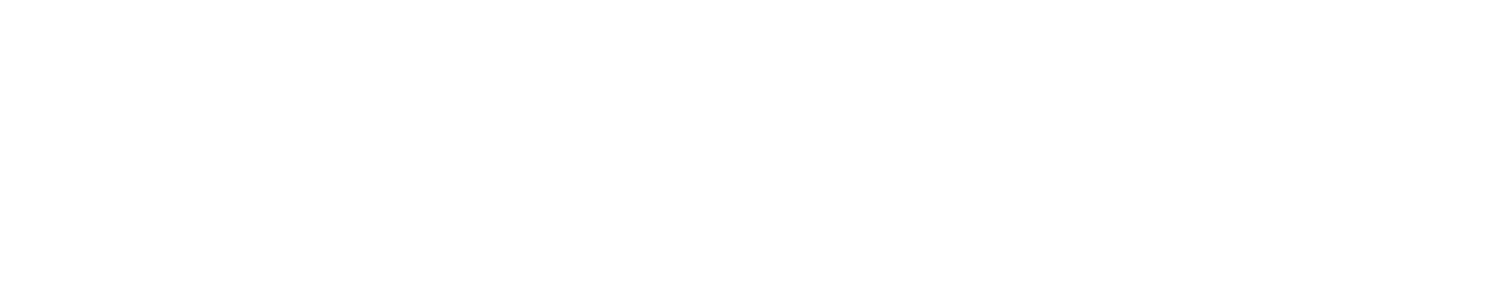

In [2]:
def f(Rmin, Rmax, Gmin, Gmax, Bmin, Bmax):

     # Read images
    color_image = cv2.cvtColor(cv2.imread('./data/threshold.jpg'), cv2.COLOR_BGR2RGB)

    # Define image formats
    white_image = np.zeros((np.shape(color_image)[0], np.shape(color_image)[1], 3), np.uint8)

    # Initial mask
    white_image[:] = [255, 255, 255]

    # Define bounds on Hue value
    lower_color = np.array([Rmin, Gmin, Bmin])
    upper_color = np.array([Rmax, Gmax, Bmax])

    # Gaussian blur
    blurred_image = cv2.GaussianBlur(color_image, (7, 7), 0)

    # Convert to hsv color space
    rgb = cv2.cvtColor(blurred_image, cv2.COLOR_BGR2RGB)

    # Get mask
    mask = cv2.inRange(rgb, lower_color, upper_color)

    # Erode to close gaps
    mask = cv2.erode(mask, None, iterations=2)

    # Dilate to reduce data
    mask = cv2.dilate(mask, None, iterations=2)

    # Apply mask to image
    res = cv2.bitwise_and(color_image, color_image, mask=mask)

    # Binary of image
    mask_bgr = cv2.bitwise_and(white_image, white_image, mask=mask)

    # Mount all images
    img = np.hstack((color_image, mask_bgr, res))

    plt.imshow(img, cmap="gray")
    fig.canvas.draw()

# Make figure
fig = plt.figure(figsize=(15, 3))

# Call your function with the initial slider values
a = interactive(f, Rmin=(0,255,1), Rmax=(0,255,1), Gmin=(0,255,1), Gmax=(0,255,1), Bmin=(0,255,1), Bmax=(0,255,1), orientation='horizontal')
display(a)

## Thresholding using HSV space

interactive(children=(IntSlider(value=89, description='Hmin', max=179), IntSlider(value=89, description='Hmax'…

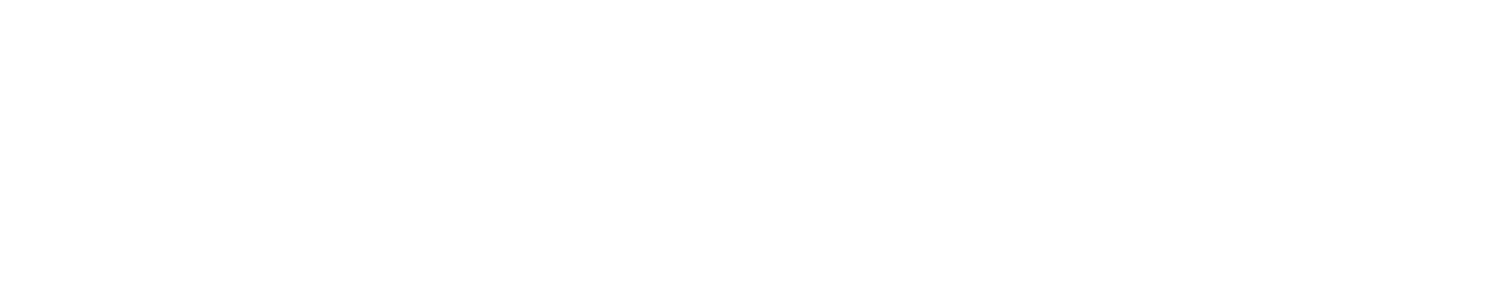

In [3]:
def f(Hmin, Hmax, Smin, Smax, Vmin, Vmax):

    # Read images
    color_image = cv2.cvtColor(cv2.imread('./data/threshold.jpg'), cv2.COLOR_BGR2RGB)

    # Define image formats
    white_image = np.zeros((np.shape(color_image)[0], np.shape(color_image)[1], 3), np.uint8)

    # Initial mask
    white_image[:] = [255, 255, 255]

    # Define bounds on Hue value
    lower_color = np.array([Hmin, Smin, Vmin])
    upper_color = np.array([Hmax, Smax, Vmax])

    # Gaussian blur
    blurred_image = cv2.GaussianBlur(color_image, (7, 7), 0)

    # Convert to hsv color space
    hsv = cv2.cvtColor(blurred_image, cv2.COLOR_BGR2HSV)

    # Get mask
    mask = cv2.inRange(hsv, lower_color, upper_color)

    # Erode to close gaps
    mask = cv2.erode(mask, None, iterations=2)

    # Dilate to reduce data
    mask = cv2.dilate(mask, None, iterations=2)

    # Apply mask to image
    res = cv2.bitwise_and(color_image, color_image, mask=mask)

    # Binary of image
    mask_bgr = cv2.bitwise_and(white_image, white_image, mask=mask)

    # Mount all images
    img = np.hstack((color_image, mask_bgr, res))

    plt.imshow(img)
    fig.canvas.draw()

# Make figure
fig = plt.figure(figsize=(15, 3))

# Call your function with the initial slider values
a = interactive(f, Hmin=(0,179,1), Hmax=(0,179,1), Smin=(0,255,1), Smax=(0,255,1), Vmin=(0,255,1), Vmax=(0,255,1), orientation='horizontal')
display(a)